## Importing Libraries

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns

## Data Preprocessing

#### Training Image Preprocessing

In [4]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels = "inferred",
    label_mode = "categorical",
    class_names = None,
    color_mode = "rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


#### Validation Image Preprocessing

In [5]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [6]:
print(training_set)
print(validation_set)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>


## Building Model

In [7]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout # type: ignore
from tensorflow.keras.models import Sequential

In [8]:
model = Sequential();

### Building Convolution Layer

In [9]:
model.add(Conv2D(filters = 32,kernel_size = 3, padding='same', activation = 'relu', input_shape = [128, 128, 3]))
model.add(Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))
model.add(MaxPool2D(pool_size=2,strides =2))

c:\Users\fs21c\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters = 64,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 64,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides =2))

In [11]:
model.add(Conv2D(filters = 128,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 128,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides =2))

In [12]:
model.add(Conv2D(filters = 256,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 256,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides =2))

In [13]:
model.add(Conv2D(filters = 512,kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters = 512,kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2,strides =2))

In [14]:
model.add(Dropout(0.25))

In [ ]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500, activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
model.add(Dense(units=38, activation='softmax'))

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
training_history = model.fit(x = training_set, validation_data = validation_set, epochs = 10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1964s 894ms/step - accuracy: 0.5987 - loss: 1.3270 - val_accuracy: 0.8608 - val_loss: 0.4457
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1935s 881ms/step - accuracy: 0.8529 - loss: 0.4610 - val_accuracy: 0.9077 - val_loss: 0.2848
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1896s 863ms/step - accuracy: 0.9106 - loss: 0.2780 - val_accuracy: 0.9288 - val_loss: 0.2197
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2091s 952ms/step - accuracy: 0.9368 - loss: 0.1952 - val_accuracy: 0.9522 - val_loss: 0.1546
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2223s 1s/step - accuracy: 0.9539 - loss: 0.1422 - val_accuracy: 0.9480 - val_loss: 0.1574
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1928s 878ms/step - accuracy: 0.9640 - loss: 0.1073 - val_accuracy: 0.9527 - val_loss: 0.1545
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1897s 863ms/step - accuracy: 0.9700 - loss: 0.0916 - val_accuracy: 0.9647 - val_loss: 0.1151
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1370s 623ms/step

## Model Evaluation

In [28]:
traing_loss, train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 346s 157ms/step - accuracy: 0.9912 - loss: 0.0258


In [29]:
print(traing_loss, train_acc)

0.02362804301083088 0.9921189546585083


In [22]:
val_loss, val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 144s 261ms/step - accuracy: 0.0248 - loss: 4.1419


In [30]:
print(val_loss, val_acc)

4.135237216949463 0.025267470628023148


## Saving Model

In [31]:
model.save("trained_model.h5")

In [32]:
model.save("trained_model.keras")

In [33]:
training_history.history

{'accuracy': [0.6998648643493652,
  0.8723664283752441,
  0.9198378324508667,
  0.9432249665260315,
  0.9568248391151428,
  0.9655736684799194,
  0.9714915752410889,
  0.9770253896713257,
  0.9804537892341614,
  0.9819759726524353],
 'loss': [0.9796168208122253,
  0.3997710347175598,
  0.24514725804328918,
  0.17608177661895752,
  0.132632777094841,
  0.10359052568674088,
  0.08613085746765137,
  0.07031193375587463,
  0.0617804117500782,
  0.056512318551540375],
 'val_accuracy': [0.8608012795448303,
  0.9076940417289734,
  0.9287502765655518,
  0.9521966576576233,
  0.9479854106903076,
  0.9527088403701782,
  0.9647166132926941,
  0.9640336632728577,
  0.9496358036994934,
  0.968529462814331],
 'val_loss': [0.44571590423583984,
  0.28484901785850525,
  0.21970625221729279,
  0.1546090990304947,
  0.15737281739711761,
  0.1544816642999649,
  0.11510936170816422,
  0.1233866885304451,
  0.17909708619117737,
  0.11304330080747604]}

In [34]:
# recording history in json 
import json
with open("training_hist.json", "w") as f:
    json.dump(training_history.history, f)

## Accuracy Visualization

In [36]:
epochs = (i for i in range[1, 11])
plt.plot(epochs, training_history.history['accuracy'], color = 'red', label = 'Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color = 'blue', label = 'Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

TypeError: type 'range' is not subscriptable

### Some Other Metrics For Model Evaluation

In [37]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [38]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred = model.predict(test_set)
y_pred, y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 92s 166ms/step


(array([[1.0000000e+00, 6.9244841e-09, 4.4545978e-11, ..., 4.0473319e-19,
         3.1423212e-16, 1.3388380e-14],
        [9.9999905e-01, 8.1649677e-07, 9.7519056e-08, ..., 2.1107244e-15,
         9.2513703e-13, 7.0255503e-11],
        [1.0000000e+00, 3.0885401e-12, 3.7908893e-13, ..., 5.2573664e-22,
         1.0408539e-18, 1.4723553e-16],
        ...,
        [1.3448761e-09, 3.4982840e-13, 6.9675399e-09, ..., 1.0484193e-10,
         1.1249228e-10, 9.9999976e-01],
        [6.5911916e-09, 8.4217962e-12, 2.6174291e-08, ..., 1.0949314e-10,
         2.1828080e-10, 9.9999845e-01],
        [1.1719208e-10, 9.6417808e-14, 9.5901438e-12, ..., 5.7708057e-14,
         1.7234899e-11, 9.9999964e-01]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories = tf.argmax(y_pred, axis = 1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [41]:
true_categories = tf.concat([y for x,y in test_set], axis = 0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true = tf.argmax(true_categories, axis = 1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(Y_true, predicted_categories,target_names = class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.92      0.99      0.95       504
                                 Apple___Black_rot       0.97      1.00      0.99       497
                          Apple___Cedar_apple_rust       0.91      0.99      0.95       440
                                   Apple___healthy       0.97      0.96      0.97       502
                               Blueberry___healthy       0.97      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.97      0.99      0.98       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.87      0.96      0.91       410
                       Corn_(maize)___Common_rust_       0.99      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.98      0.91      0.

In [46]:
cm = confusion_matrix(Y_true, predicted_categories)
cm
cm.shape

(38, 38)

## Confusion Matrix Visulation

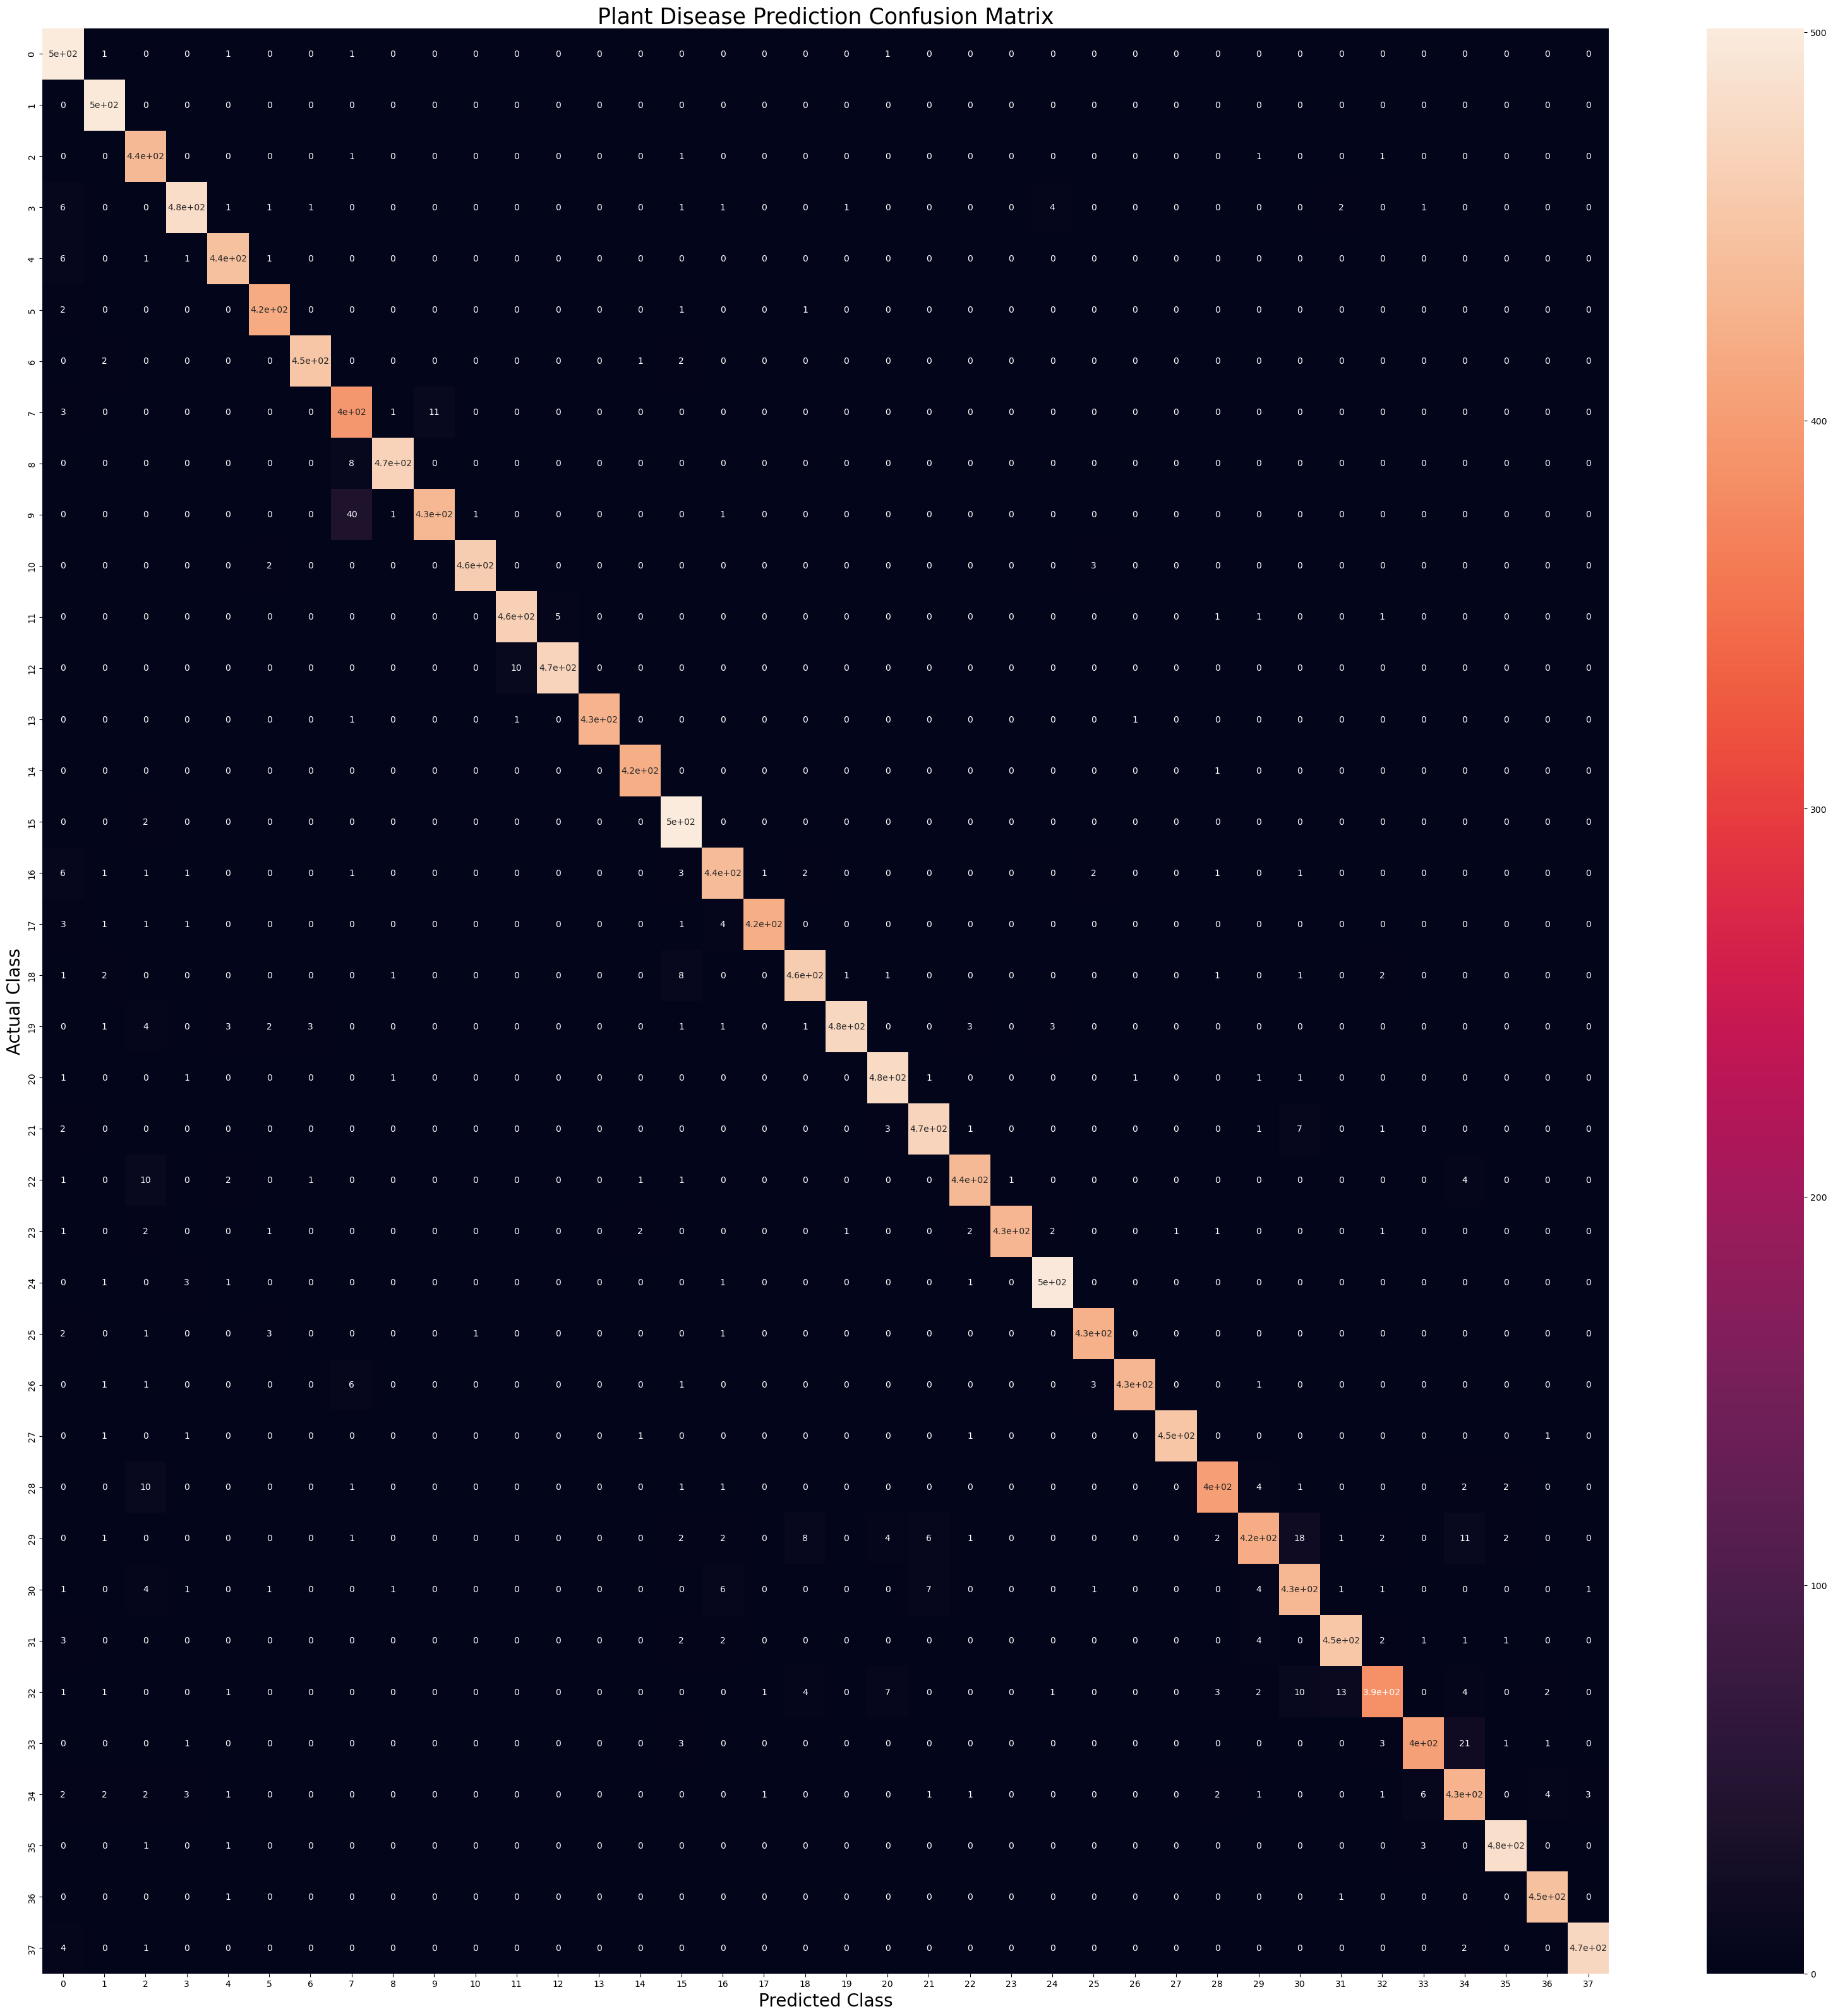

In [47]:
plt.figure(figsize = [40,40])
sns.heatmap(cm, annot = True, annot_kws={'size': 10})
plt.xlabel("Predicted Class", fontsize = 20)
plt.ylabel("Actual Class", fontsize = 20)
plt.title("Plant Disease Prediction Confusion Matrix", fontsize = 25)
plt.show()